In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


## <font color='purple'><b>Data Preprocessing :

### <font color='magenta'><b>Transform Date to datetime object and Set as Index :

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [57]:
df = data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

### <font color='magenta'><b>Check for Holidays :

In [4]:
from datetime import date

In [3]:
data.head(1).index, data.tail(1).index

(0    2012-01-03
 Name: Date, dtype: object,
 2010    2019-12-30
 Name: Date, dtype: object)

In [13]:
d0 = date(2012,1,3)
d1 = date(2019,12,30)
days = len(pd.date_range((d0),(d1)))
print(f'The number of days from {d0} to {d1} is {days} days')
print()
bdays = len(pd.bdate_range((d0),(d1)))
print(f'The number of business days from {d0} to {d1} is {bdays} days')
print()
print(f'The number of days from {d0} to {d1} in the given time series is {len(data)} days')

The number of days from 2012-01-03 to 2019-12-30 is 2919 days

The number of business days from 2012-01-03 to 2019-12-30 is 2085 days

The number of days from 2012-01-03 to 2019-12-30 in the given time series is 2011 days


<font color='hotpink'><b><I>So the time series contains holidays other than weekends.

### <font color='magenta'><b>Create CustomBusinessDay :

In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [15]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [17]:
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [18]:
C = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=C)
print(my_range.difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


<font color='hotpink'><b><I>C is the custom frequency here that includes the holidays other than weekends.

In [58]:
df = df.asfreq('C')

In [25]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2085, freq='C')

<font color='hotpink'><b><I>Now the datetime index has the frequncy C.

## <font color='purple'><b>Time Series Analysis :

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200.0
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0


<font color='green'><b>Open - <font color='peach'><b><I>The open is the trader's first chance to get a look at what the trading day may hold,ranging, trending, sedate, or volatile.
    
<font color='green'><b>High - <font color='peach'><b><I>Trading day's intraday high price.
    
<font color='green'><b>Low - <font color='peach'><b><I>Trading day's intraday low price.
    
<font color='green'><b>Close - <font color='peach'><b><I>The price at which the share closes at the end of trading hours of the stock market.
    
<font color='green'><b>Adj Close - <font color='peach'><b><I>Stock's closing price after accounting for any corporate actions.
    
<font color='green'><b>Volume - <font color='peach'><b><I>The total number of shares traded in a specified time frame.

<font color='magenta'><b>Considering only the closing price for the analysis : 

In [59]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


### <font color='magenta'><b>Downsampling the data to Monthly :

<font color='hotpink'><b>  - It reduces the granularity in the data.

In [60]:
df_m = df.resample('M').mean()
df_m.head(),df_m.tail()

(                Close
 Date                 
 2012-01-31  61.225428
 2012-02-29  71.081572
 2012-03-31  82.501104
 2012-04-30  86.571857
 2012-05-31  80.667597,
                  Close
 Date                  
 2019-08-31  204.957728
 2019-09-30  217.994999
 2019-10-31  235.286521
 2019-11-30  262.520503
 2019-12-31  275.669496)

### <font color='green'><b>Line plot :

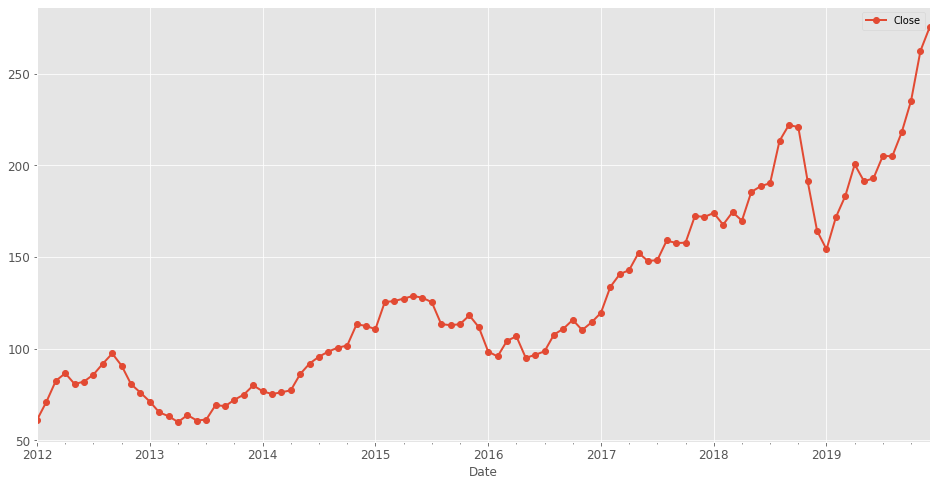

In [61]:
df_m.plot(figsize=(16,8), linewidth=2,marker='o', fontsize=12);

<font color='green'><b>Conditions for Stationarity :
    
<font color='peach'><b> 1) Constant Mean

<font color='peach'><b>2) Constant Variance
     
<font color='peach'><b>3) No Seasonality
    
<font color='green'><b>Check for Stationarity :
    
<font color='peach'><b> 1) Visual Inspection
    
<font color='peach'><b> 2) Global vs Local check
    
<font color='peach'><b> 3) Statistical Tests :
    
<font color='orange'><b>     - ADF(Augmented Dickey-Fuller Test   
    
<font color='orange'><b>     - KPPS(Kwiatkowski–Phillips–Schmidt–Shin) Test
    
### <font color='green'><b>Visual Inspection :
    
<font color='peach'><b>   From the above line plot, the mean is not constant and the variance is also not constant. Roughly, the time series don't seem to have any repeating patterns, hence no seasonality.

### <font color='orange'><b>Augmented Dickey-Fuller Test :

<font color='green'><b>Null Hypothesis - <font color='peach'><b>Time series has unit root, hence not stationary

<font color='green'><b>Alternate Hypothesis - <font color='peach'><b>Time series has no unit root, hence stationary

<font color='green'><b><I> If p-value is less than 0.05, reject Null Hypothesis

<font color='green'><b><I>If p-value is greater than 0.05, fail to reject Null Hypothesis


In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
def test_stationarity(series):
    
    stat_test = adfuller(series,autolag='AIC')

    print('Test Statistic : ',stat_test[0])
    print('p value : ',stat_test[1])
    print('Number of Lags : ',stat_test[2])
    print('Critical values : ')
    for key, val in stat_test[4].items():
        print('\t',key, ': ',val)
    print()    
    if stat_test[1] > 0.05:
        print('Series is non-stationary')
    else:
        print('Series is stationary')

In [62]:
test_stationarity(df_m)

Test Statistic :  0.5121100349491
p value :  0.9852365602721007
Number of Lags :  1
Critical values : 
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781

Series is non-stationary


### <font color='magenta'><b>Check the order of differencing needed :

In [38]:
import pmdarima as pm

In [64]:
diff = pm.arima.ndiffs(df_m['Close'],max_d=4)
print(f'Order of non-seasonal Differencing = {diff}')

Order of non-seasonal Differencing = 1


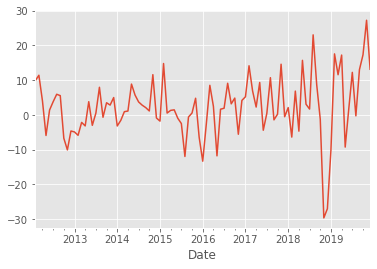

In [65]:
dfm_lag = df_m['Close'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
dfm_lag.plot();

In [66]:
diff1 = pm.arima.ndiffs(dfm_lag,max_d=4)
print(f'Order of non-seasonal Differencing = {diff1}')

Order of non-seasonal Differencing = 0


In [67]:
test_stationarity(dfm_lag)

Test Statistic :  -6.555008552494957
p value :  8.66041288139397e-09
Number of Lags :  0
Critical values : 
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781

Series is stationary


<font color='maroon'><b>The p value is very low and the test statistic is less than 1% critical value. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

<font color='maroon'><b>Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## <font color='purple'><b>Exploratory Data Analysis :

In [68]:
d = df_m.copy()

# Separating month and date into separate column

d["month"] = d.index.strftime("%B") # month extraction
d["year"] = d.index.strftime("%Y") # year extraction
d['Q'] = d.index.quarter    # quarter extraction

# categorizing the quarters
d.loc[d['Q']==1,'quarter']='Q1'
d.loc[d['Q']==2,'quarter']='Q2'
d.loc[d['Q']==3,'quarter']='Q3'
d.loc[d['Q']==4,'quarter']='Q4'

d.head(12)

,Close,month,year,Q,quarter
Date,,,,,
2012-01-31,61.225428,January,2012,1,Q1
2012-02-29,71.081572,February,2012,1,Q1
2012-03-31,82.501104,March,2012,1,Q1
2012-04-30,86.571857,April,2012,2,Q2
2012-05-31,80.667597,May,2012,2,Q2
2012-06-30,82.080340,June,2012,2,Q2
2012-07-31,85.866871,July,2012,3,Q3
2012-08-31,91.813727,August,2012,3,Q3
2012-09-30,97.366918,September,2012,3,Q3


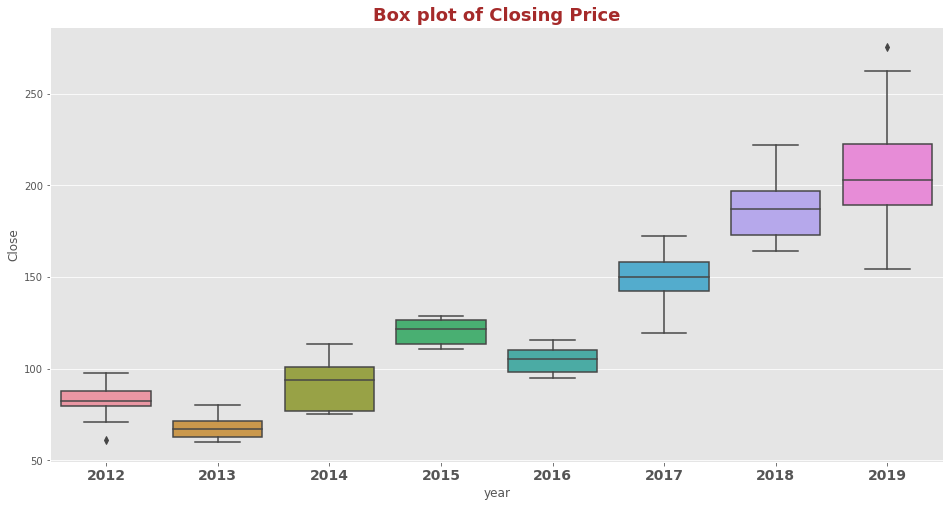

In [81]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,fontweight='bold')
sns.boxplot(x="year",y="Close",data=d)
plt.title('Box plot of Closing Price',fontweight='bold',fontsize=18,color='brown');

<font color='maroon'><b><I>As seen in the plot the mean is not constant over the years, which proves the time series is not stationary. There is an outlier below lower whisker in the year 2012 which indicates the price was lower than minimum at some instance and there is an outlier on the higher side in the year 2019 which indicates the value of stock had gone up more than the maximum at an instance.

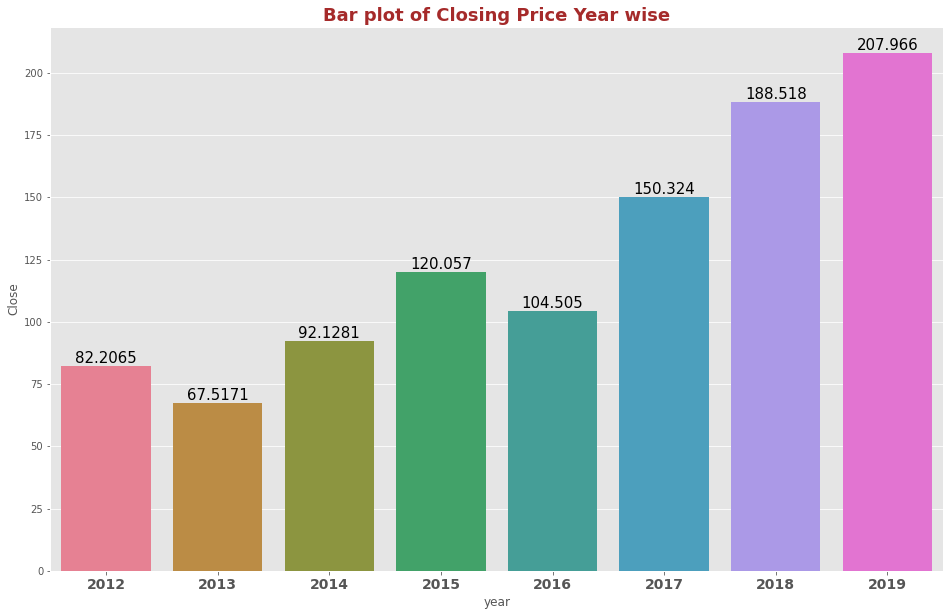

In [82]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Year wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The bars represent the frequencies of distinct values of stock price. In the above plot, we can see after a few ups and downs from 2012 to 2016 the apple stock price has increased largely since 2017 and overall there is a upward trend.

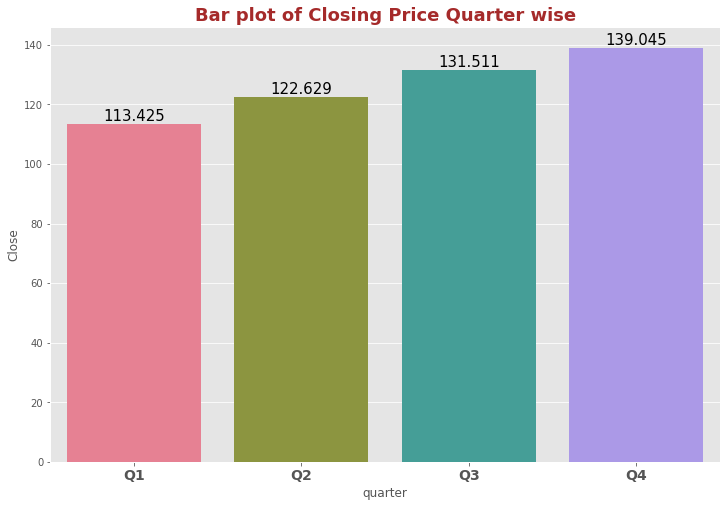

In [83]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=d,x='quarter',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Quarter wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The quarter plot shows a clear upward trend .

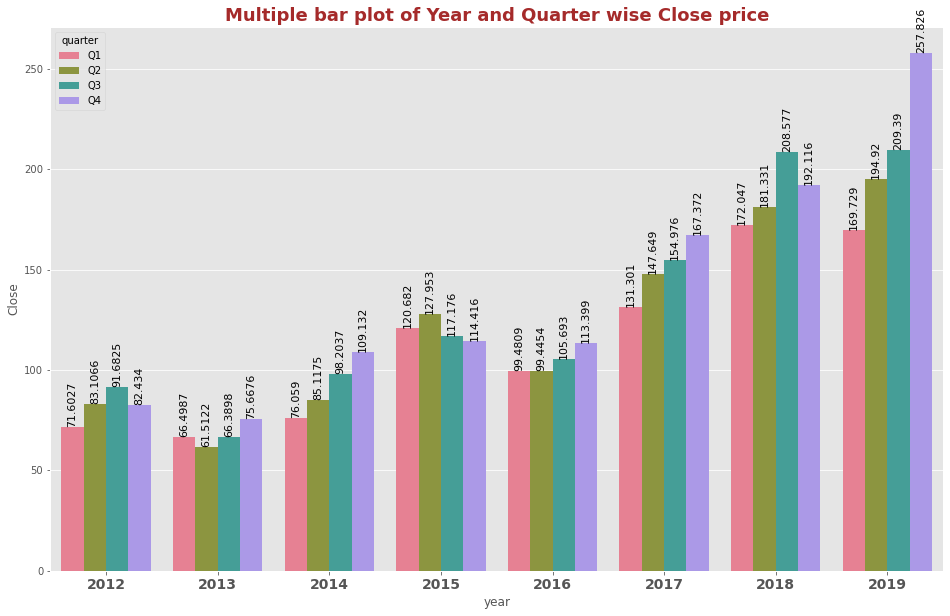

In [84]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',hue='quarter',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Multiple bar plot of Year and Quarter wise Close price',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=11,rotation=90)

<font color='maroon'><b><I>There is a steep increase in the adj closing price of stocks in the last quarter of year 2019 whcih will possibly have greater impact in the prices of the coming year. 

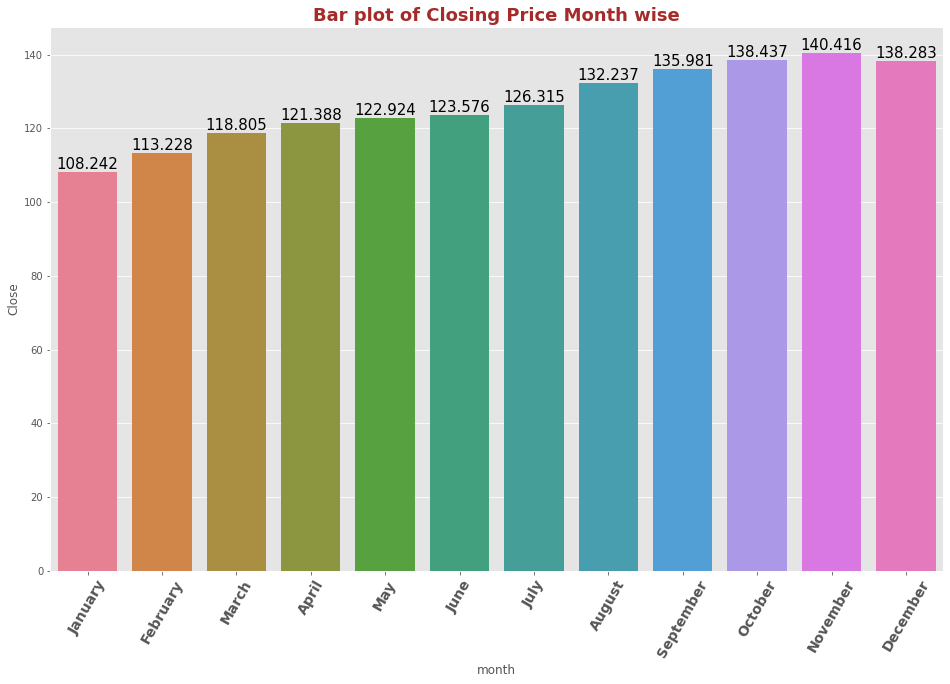

In [85]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='month',y='Close',palette='husl',ci=None)
plt.xticks(rotation=60,fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Month wise',fontweight='bold',fontsize=18,color='brown');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>The adj close price is higher in the month of November followed by December and October. This must be due to soaring of stock price in the last quarter of the year 2019 which we saw above.

### <font color='magenta'><b>Pivot table for year and quarter :

In [75]:
d_pivot = d.pivot_table(values='Close', index='year', columns='quarter')
d_pivot

quarter,Q1,Q2,Q3,Q4
year,,,,
2012,71.602701,83.106598,91.682505,82.434047
2013,66.498682,61.512177,66.389781,75.667566
2014,76.059047,85.117529,98.203716,109.132064
2015,120.681505,127.953248,117.175945,114.416439
2016,99.480906,99.445361,105.692953,113.399048
2017,131.300678,147.648643,154.976435,167.371655
2018,172.046792,181.330844,208.577068,192.115894
2019,169.729298,194.919609,209.389697,257.825507


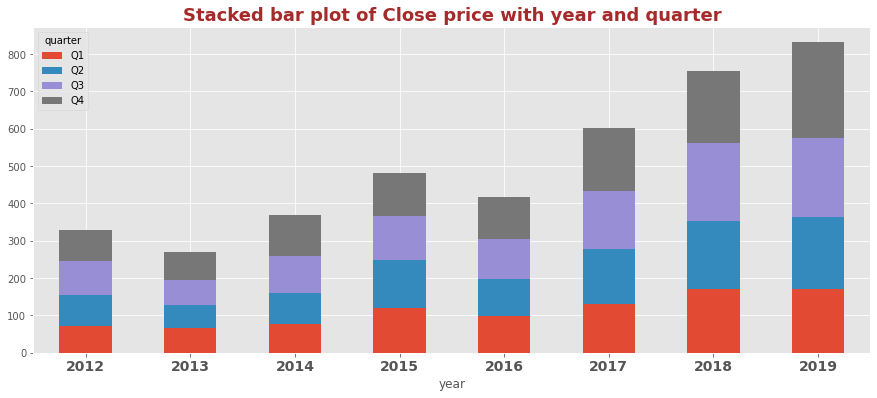

In [76]:
d_pivot.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title('Stacked bar plot of Close price with year and quarter',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

<font color='maroon'><b><I>The plot shows the yearly raising trend of stock price along with the quarters. The year 2013 has the lowest stock price in all quarters. 

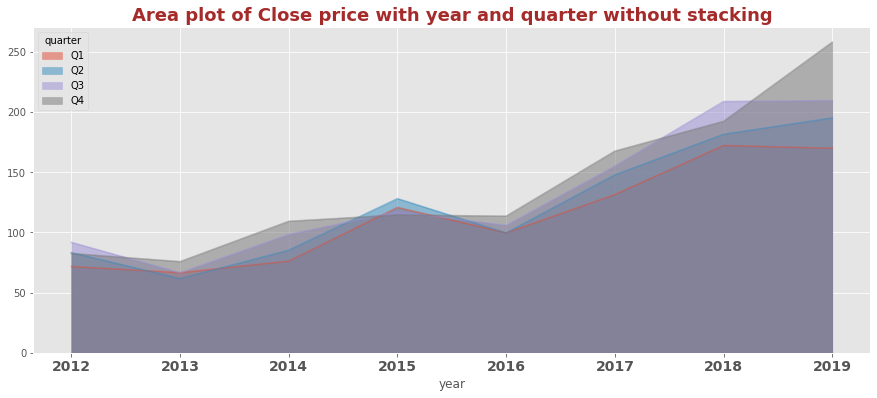

In [77]:
d_pivot.plot(kind='area',stacked=False,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter without stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

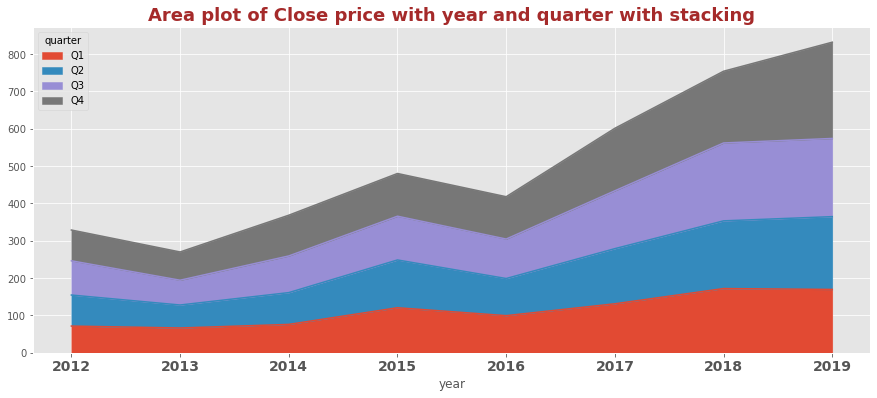

In [78]:
d_pivot.plot(kind='area',stacked=True,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter with stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

<font color='maroon'><b><I>Both the plots show how the last quarter of 2019 has larger area indicating soaring stock price.

### <font color='magenta'><b>Pivot table for year and month :

In [79]:
d_pivot2 = d.pivot_table(values='Close', index='year', columns='month')
d_pivot2

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2012,86.571857,91.813727,76.007857,71.081572,61.225428,85.866871,82.080340,82.501104,80.667597,80.620817,90.673469,97.366918
2013,59.966428,69.263376,79.951088,65.258422,71.117483,61.308182,60.791143,63.120143,63.778961,74.945214,72.106398,68.597786
2014,77.296327,98.436667,112.411364,75.225714,76.777959,95.625909,91.885443,76.173468,86.170817,113.285263,101.699566,100.548572
2015,127.291428,113.394762,111.726818,125.432105,110.641501,125.335455,127.806817,125.970908,128.761500,118.162500,113.360000,112.797619
2016,106.739048,107.665218,114.335714,95.746500,98.428946,98.556500,96.622273,104.267273,94.974762,110.154285,115.707143,110.857142
2017,142.886842,159.021306,171.891500,133.714209,119.570000,148.299499,147.831362,140.617826,152.227726,172.406191,157.817273,157.608500
2018,169.834287,213.346089,164.266317,167.638947,174.005237,190.311429,188.621429,174.496192,185.536818,191.235714,220.845652,222.073685
2019,200.516191,204.957728,275.669496,171.727893,154.166190,205.216364,192.969000,183.293810,191.273637,262.520503,235.286521,217.994999


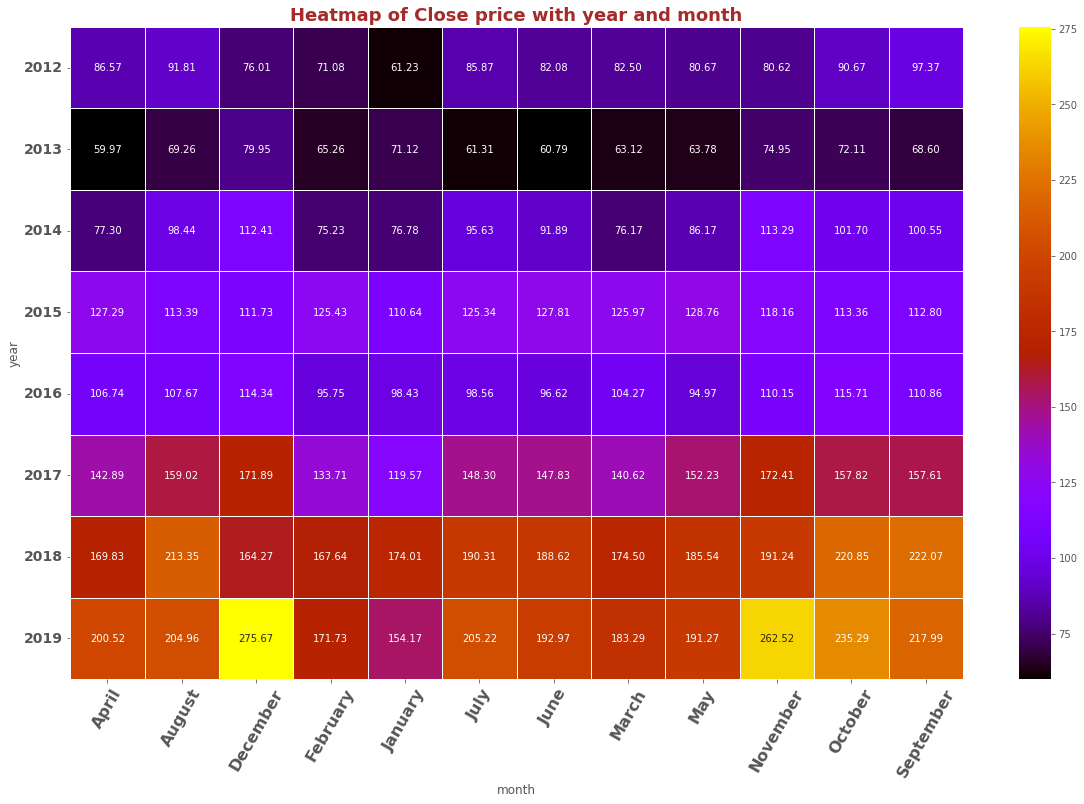

In [80]:
plt.figure(figsize=(20,12))
sns.heatmap(d_pivot2,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(rotation=0,fontsize=14,fontweight='bold')
plt.title('Heatmap of Close price with year and month',fontweight='bold',fontsize=18,color='brown');

<font color='maroon'><b><I> The lighter cells indicate higher values of stock price and the darker cells indicate the lower values of stock price. The yellow cell in the above plot is of 2019 December which has the highest stock price followed by November of 2019. The darker ones at the top show lower stock prices and the plot overall shows the soaring stock prices over the years.

## <font color='magenta'><b>ACF and PACF plots :

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

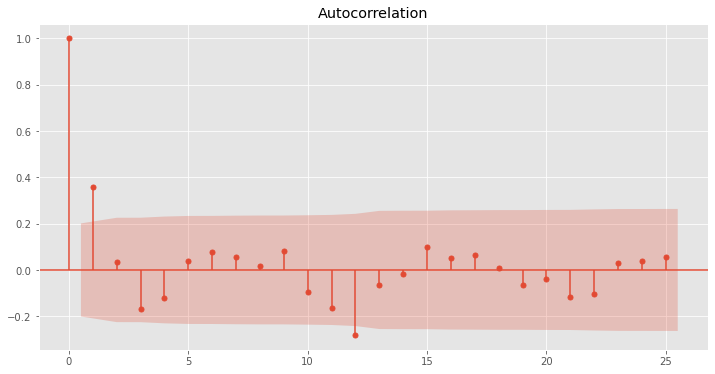

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
acf = plot_acf(dfm_lag,lags=25,ax=ax)

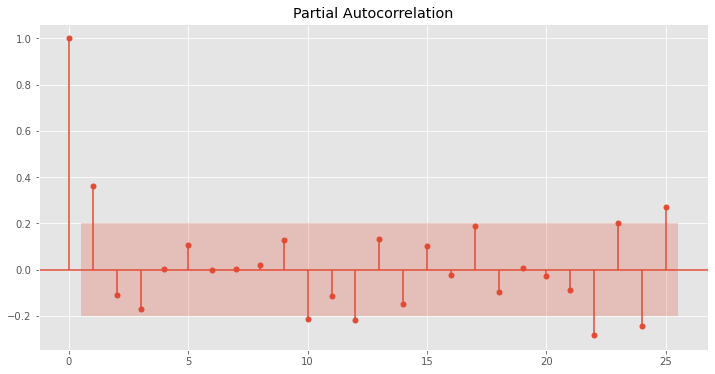

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
pacf = plot_pacf(dfm_lag,lags=25,ax=ax)

<font color='maroon'><b>In both ACF and PACF plots, it's not clear whether they are tailing off or cutting off and since the time series needed first order differencing to make it stationary it is <font color='green'><b>ARIMA model</b></font> that has to used for forcasting.
<font color='maroon'><b>Here since in acf and pacf plot only one point in each is above the confidence band, <font color='green'><b>p = 1, q = 1, d = 1.